<a href="https://colab.research.google.com/github/Kushank2003/movie-analyzer/blob/main/movie_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Successfully loaded data from movies.csv

First 5 rows of the data:
                                           Title    Genre  Rating  Year
0                       The Shawshank Redemption    Drama     9.3  1994
1                                  The Godfather    Crime     9.2  1972
2                                The Dark Knight   Action     9.0  2008
3                                   Pulp Fiction    Crime     8.9  1994
4  The Lord of the Rings: The Return of the King  Fantasy     8.9  2003

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   10 non-null     object 
 1   Genre   10 non-null     object 
 2   Rating  10 non-null     float64
 3   Year    10 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes

Basic Statistics for Rating:
count    10.000000
mean      8.890000
std       0.223358
min       8

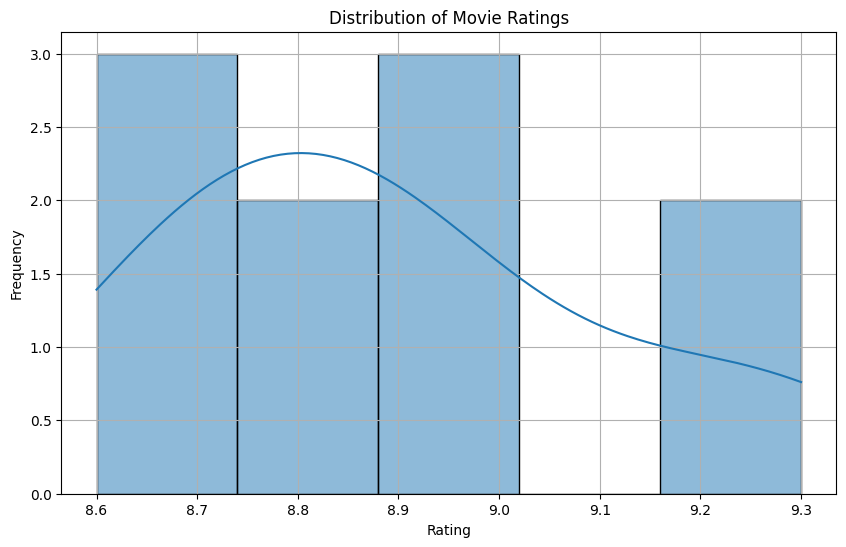

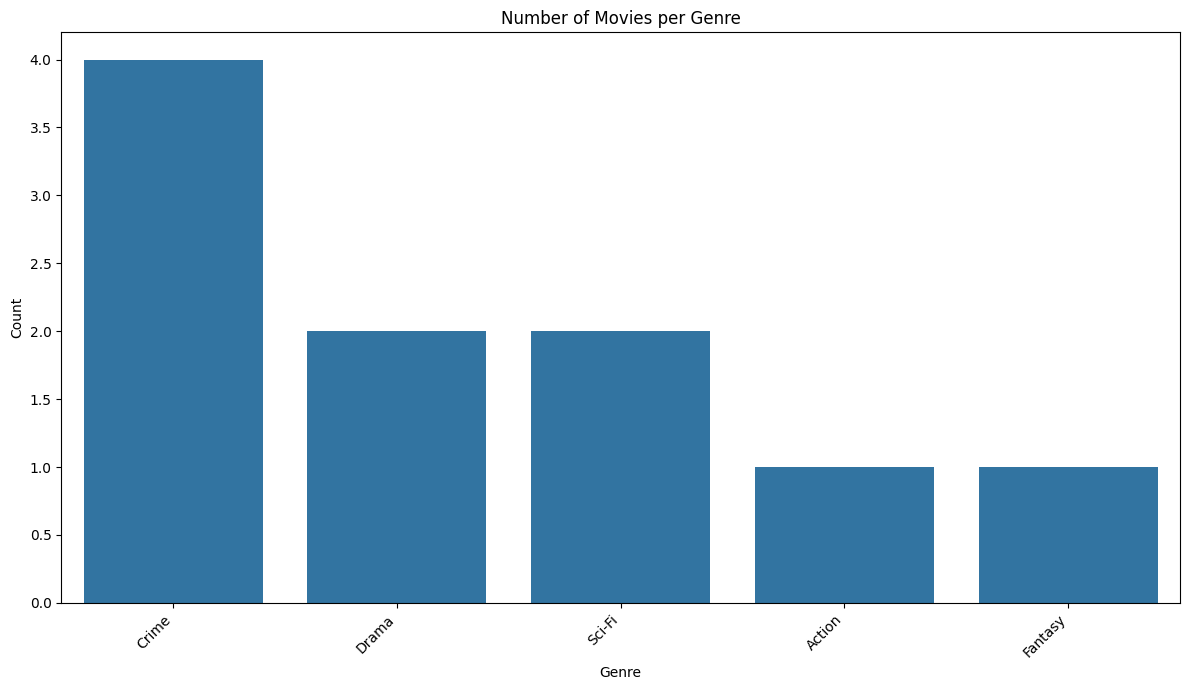

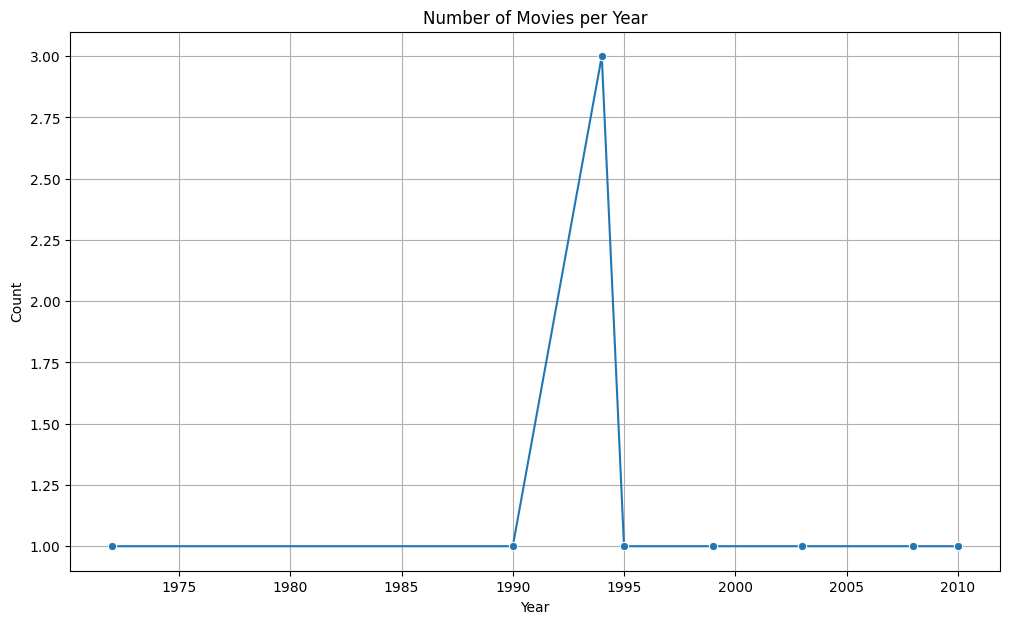


Analysis complete.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
CSV_FILE = 'movies.csv'

# --- Data Loading ---
try:
    df = pd.read_csv(CSV_FILE)
    print(f"Successfully loaded data from {CSV_FILE}")
    print("\nFirst 5 rows of the data:")
    print(df.head())
    print("\nData Info:")
    df.info()
except FileNotFoundError:
    print(f"Error: {CSV_FILE} not found. Please make sure the file exists.")
    exit() # Exit if the file is not found

# --- Data Analysis ---
print("\nBasic Statistics for Rating:")
print(df['Rating'].describe())

# Find the movie with the highest rating
highest_rated_movie = df.loc[df['Rating'].idxmax()]
print(f"\nHighest rated movie: {highest_rated_movie['Title']} ({highest_rated_movie['Rating']})")

# Count movies by genre
genre_counts = df['Genre'].value_counts()
print("\nMovies per Genre:")
print(genre_counts)

# Count movies by year
year_counts = df['Year'].value_counts().sort_index()
print("\nMovies per Year:")
print(year_counts)


# --- Data Visualization ---
print("\nGenerating visualizations...")

# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=5)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot movies per genre
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Plot movies per year
plt.figure(figsize=(12, 7))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

print("\nAnalysis complete.")